# Correlation Checks
## 01. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## 02. Data

In [2]:
fset = pd.read_csv(r'C:\Users\jmanc\OneDrive\Desktop\F1 Project\Data\Prepped Data\full_check.csv')
stat = pd.read_pickle(r'C:\Users\jmanc\OneDrive\Desktop\F1 Project\Data\Prepped Data\status.pkl')

In [3]:
#adding status to set
fset = fset.merge(stat, on = 'statusId')
fset.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,driverRef,code,forename,surname,nationality,lap_num,lap_pos,lap_time,lap_milli,status
0,22131,900,825,1,20,4,2.0,2,2,18.0,...,kevin_magnussen,MAG,Kevin,Magnussen,Danish,1,3,01:45.4,105402,Finished
1,22131,900,825,1,20,4,2.0,2,2,18.0,...,kevin_magnussen,MAG,Kevin,Magnussen,Danish,2,3,01:37.4,97435,Finished
2,22131,900,825,1,20,4,2.0,2,2,18.0,...,kevin_magnussen,MAG,Kevin,Magnussen,Danish,3,3,01:37.9,97917,Finished
3,22131,900,825,1,20,4,2.0,2,2,18.0,...,kevin_magnussen,MAG,Kevin,Magnussen,Danish,4,3,01:36.8,96796,Finished
4,22131,900,825,1,20,4,2.0,2,2,18.0,...,kevin_magnussen,MAG,Kevin,Magnussen,Danish,5,3,01:36.8,96766,Finished


In [6]:
#exporting change
fset.to_pickle(r'C:\Users\jmanc\OneDrive\Desktop\F1 Project\Data\Prepped Data\race_lap_full.pkl')

In [7]:
fset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206419 entries, 0 to 206418
Data columns (total 30 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   resultId         206419 non-null  int64  
 1   raceId           206419 non-null  int64  
 2   driverId         206419 non-null  int64  
 3   constructorId    206419 non-null  int64  
 4   number           206419 non-null  int64  
 5   grid             206419 non-null  int64  
 6   position         192085 non-null  float64
 7   positionText     206419 non-null  object 
 8   positionOrder    206419 non-null  int64  
 9   points           206419 non-null  float64
 10  laps             206419 non-null  int64  
 11  raceTimeMilli    112866 non-null  float64
 12  fastestLap       206078 non-null  float64
 13  rank             206419 non-null  int64  
 14  fastestLapTime   206078 non-null  object 
 15  fastestLapSpeed  206078 non-null  float64
 16  statusId         206419 non-null  int6

In [10]:
fset.isnull().sum()

resultId               0
raceId                 0
driverId               0
constructorId          0
number                 0
grid                   0
position           14334
positionText           0
positionOrder          0
points                 0
laps                   0
raceTimeMilli      93553
fastestLap           341
rank                   0
fastestLapTime       341
fastestLapSpeed      341
statusId               0
constructorRef         0
name                   0
con_nat                0
driverRef              0
code                   0
forename               0
surname                0
nationality            0
lap_num                0
lap_pos                0
lap_time               0
lap_milli              0
status                 0
dtype: int64

In [11]:
for col in fset.columns.tolist():
      weird = (fset[[col]].applymap(type) != fset[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (fset[weird]) > 0:
        print (col)

fastestLapTime


In [12]:
fset['fastestLapTime'].value_counts()

01:20.5    1128
01:16.3    1115
01:20.9    1083
01:18.9    1033
01:32.8    1023
           ... 
01:58.4       5
02:06.5       4
02:15.3       3
02:20.8       3
01:57.2       3
Name: fastestLapTime, Length: 529, dtype: int64

In [4]:
cor_set = fset.drop(
    ['positionText','fastestLapTime','constructorRef','name','con_nat','driverRef','code','forename','surname','nationality','lap_time','status','number'],
                   axis = 1)
cor_set.head()

,resultId,raceId,driverId,constructorId,grid,position,positionOrder,points,laps,raceTimeMilli,fastestLap,rank,fastestLapSpeed,statusId,lap_num,lap_pos,lap_milli
0,22131,900,825,1,4,2.0,2,18.0,57,5605487.0,49.0,6,205.131,1,1,3,105402
1,22131,900,825,1,4,2.0,2,18.0,57,5605487.0,49.0,6,205.131,1,2,3,97435
2,22131,900,825,1,4,2.0,2,18.0,57,5605487.0,49.0,6,205.131,1,3,3,97917
3,22131,900,825,1,4,2.0,2,18.0,57,5605487.0,49.0,6,205.131,1,4,3,96796
4,22131,900,825,1,4,2.0,2,18.0,57,5605487.0,49.0,6,205.131,1,5,3,96766


## 03. Relationships

In [9]:
#creating correlation table
cor_set.corr()

,resultId,raceId,driverId,constructorId,grid,position,positionOrder,points,laps,raceTimeMilli,fastestLap,rank,fastestLapSpeed,statusId,lap_num,lap_pos,lap_milli
resultId,1.000000,0.943924,0.256915,0.136806,0.026649,0.077191,0.063610,-0.030808,0.020751,0.016102,0.068545,0.059501,0.160306,0.015380,0.006039,0.061241,-0.008959
raceId,0.943924,1.000000,0.259021,0.132488,0.053715,0.088859,0.073866,-0.048233,0.020333,0.021467,0.050752,0.071347,0.131612,0.021853,0.005986,0.077397,-0.008148
driverId,0.256915,0.259021,1.000000,-0.076889,0.236588,0.263853,0.235022,-0.285677,-0.010182,0.034723,0.010003,0.244926,0.034381,0.057881,-0.003129,0.254587,-0.003099
constructorId,0.136806,0.132488,-0.076889,1.000000,0.092450,0.120053,0.101457,-0.037406,0.006149,0.007349,-0.007324,0.103157,0.008354,0.025352,0.001871,0.104311,0.005672
grid,0.026649,0.053715,0.236588,0.092450,1.000000,0.714357,0.652707,-0.657770,-0.055130,0.120512,-0.069730,0.573307,-0.085619,0.189609,-0.016651,0.732475,0.008937
position,0.077191,0.088859,0.263853,0.120053,0.714357,1.000000,1.000000,-0.875291,-0.050161,0.110798,-0.071398,0.686039,-0.069494,0.458985,-0.012321,0.868419,0.001024
positionOrder,0.063610,0.073866,0.235022,0.101457,0.652707,1.000000,1.000000,-0.860173,-0.253151,0.107182,-0.214792,0.692753,-0.096987,0.418690,-0.076757,0.802385,0.006783
points,-0.030808,-0.048233,-0.285677,-0.037406,-0.657770,-0.875291,-0.860173,1.000000,0.131825,-0.097327,0.126924,-0.653347,0.078771,-0.287022,0.039970,-0.764019,-0.006894
laps,0.020751,0.020333,-0.010182,0.006149,-0.055130,-0.050161,-0.253151,0.131825,1.000000,0.054747,0.625815,-0.180983,-0.284184,-0.225840,0.303183,-0.088386,-0.142925
raceTimeMilli,0.016102,0.021467,0.034723,0.007349,0.120512,0.110798,0.107182,-0.097327,0.054747,1.000000,-0.036494,0.088363,-0.414449,-0.017100,0.014089,0.105130,0.149259


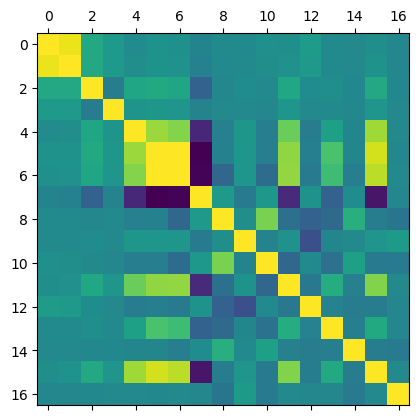

In [12]:
#creating heat map
plt.matshow(cor_set.corr())
plt.savefig('out.png')
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

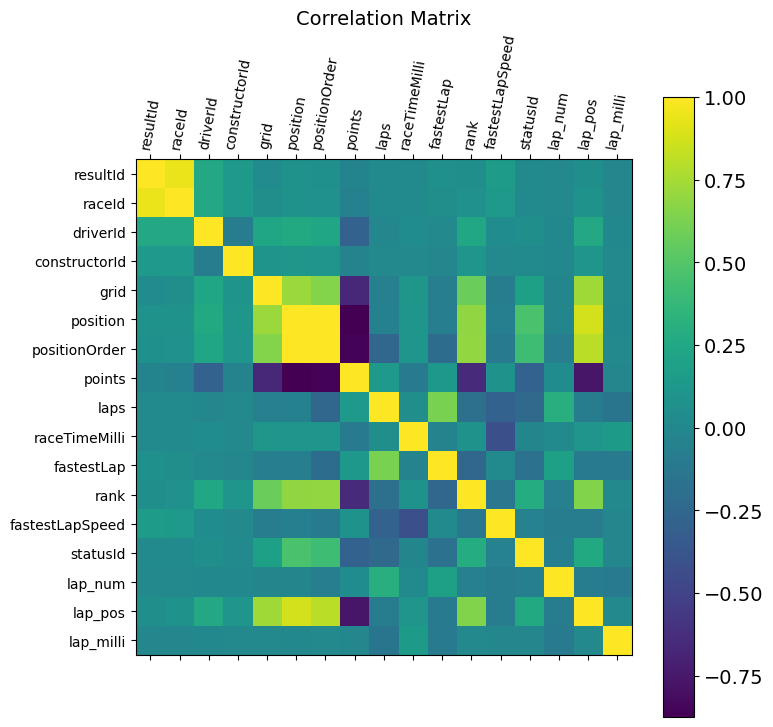

In [22]:
f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(cor_set.corr(), fignum=f.number) # type of plot
plt.xticks(range(cor_set.shape[1]), cor_set.columns, fontsize=10, rotation=80) # x axis labels
plt.yticks(range(cor_set.shape[1]), cor_set.columns, fontsize=10) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

There are not many values with solid corralations to each other. Those with negative coralations are expected as higher number positions get less points. Presently, drivers who finish the race in positions 11 - 20 get zero points.

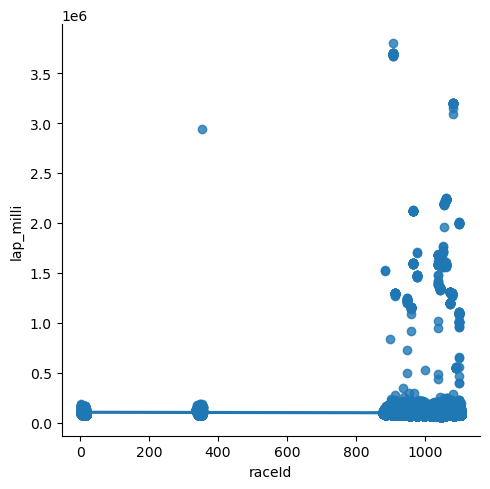

In [28]:
#creating scatter plot
sns.lmplot(x = 'raceId', y = 'lap_milli', data = cor_set)

This one looks a bit odd but the general premise is that the average lap time has gotten shorter since the first races.
Higher race IDs mean that the race happened more recently.
Shorter lap times could be the result of any number of changes including to vehicles, drivers, tracks, etc.

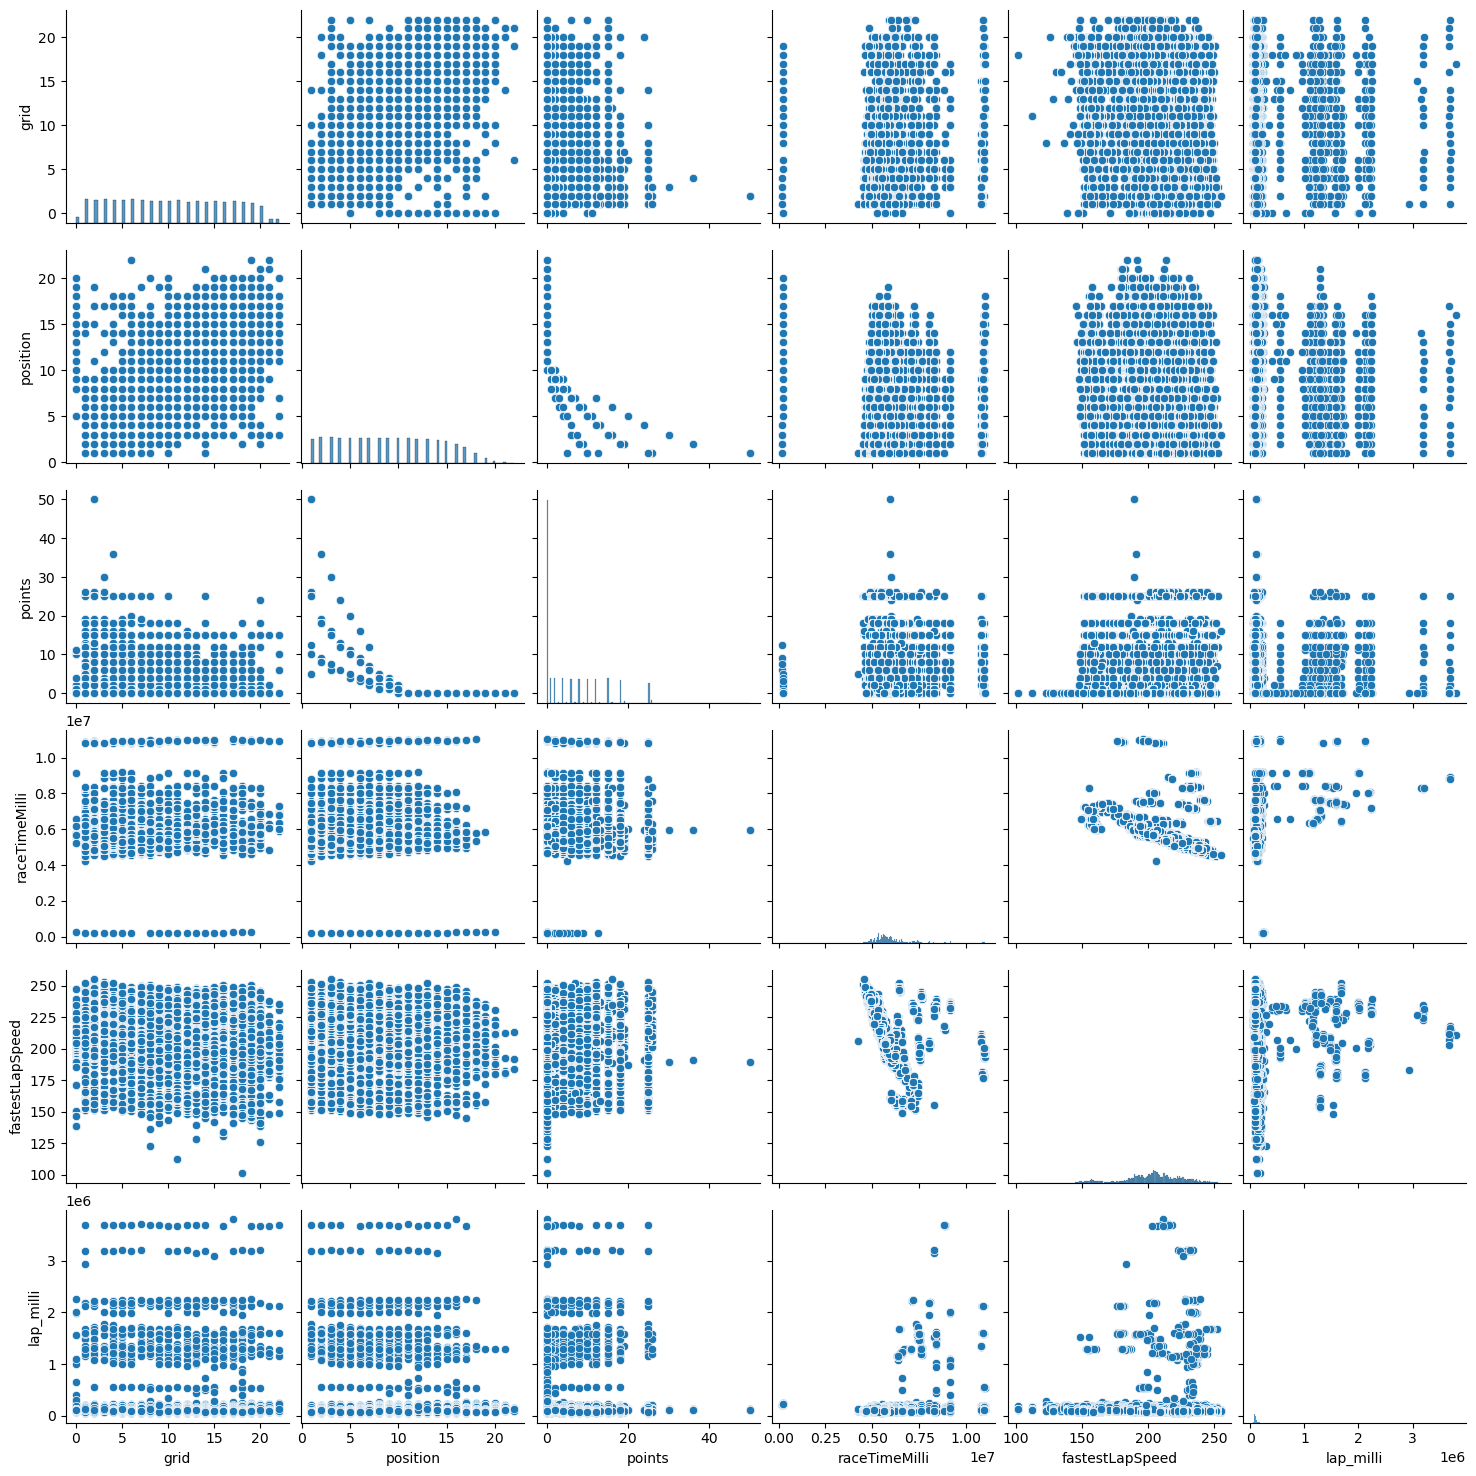

In [30]:
# creating Pair Plot
sub = cor_set[['grid','position','points','raceTimeMilli','fastestLapSpeed','lap_milli']]
p = sns.pairplot(sub)

The pair plot shows some strange distributions. I may need to alter the analysis by focusing specifically on different time periods to garner real insights as different eras have different rules for power unit composition. I am most interested in the variables that affect the lap and race times and will conduct further analysis.

In [ ]:
#categorical plot
#creating histogram for variable distribution
sns.histplot(cor_set['fastestLapSpeed'], bins = 15, kde = True)

In [9]:
#creating categories
cor_set.loc[cor_set['fastestLapSpeed'] < 185, 'fastestLapSpCategory'] = 'slower'
cor_set.loc[(cor_set['fastestLapSpeed'] >= 185) & (cor_set['fastestLapSpeed'] < 220), 'fastestLapSpCategory'] = 'average'
cor_set.loc[cor_set['fastestLapSpeed'] >= 220, 'fastestLapSpCategory'] = 'faster'
cor_set['fastestLapSpCategory'].value_counts()

average    130899
faster      46677
slower      28502
Name: fastestLapSpCategory, dtype: int64

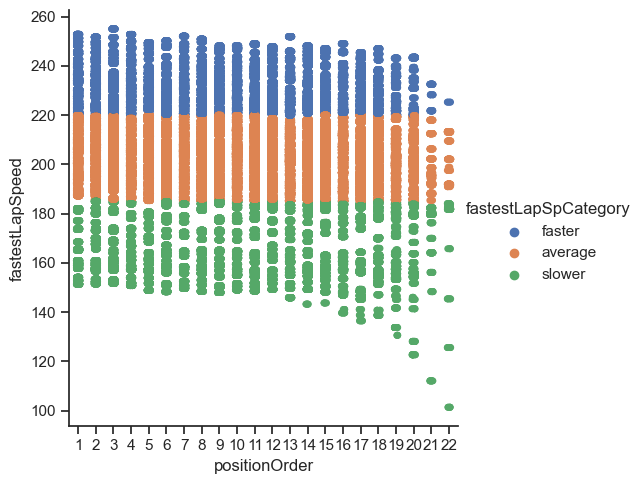

In [14]:
#creating categorical plot
sns.set(style = 'ticks')
splot = sns.catplot(x = 'positionOrder', y ='fastestLapSpeed', hue = 'fastestLapSpCategory', data = cor_set)
splot

## 04. Questions Answered:
Not many of the original questions were able to be answered yet. However, there may be a correlation between total race time and fastest lap speed. While the original correlation heat map did not find one present it may be possible that the correlation is era or season specific. The set has data since 1950 and the sport has changed since then.

## 05. Hypotheses:
### 1. The more recent the race, the faster the lap time.
### 2. Cars manufactured by Mercedes and Redbull are faster than other cars.
### 3. If a driver starts in below grid position 5 they are less likely to score points. 